Сначала нужно определить какие столбцы мы хотим загрузить из нашей таблицы. 

Так, для моего примера мне нужны столбцы Volume(unit)(2), SurfaceArea (um2)(5) + количество строк.

Шаг1. Извлечение данных из xlsx в df, с которыми я смогу работать в python

glob - показывает пути к файлам с указанным расширением и сохраняет в переменную filepaths

In [1]:
from IPython import get_ipython
get_ipython().magic('reset -sf') 

import pandas as pd
import numpy as np
import glob

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

Функция csv_to_xlsx считывает все файлы csv в папке, затем создает xlsx для каждого файла

In [2]:
def csv_to_xlsx():
    csv_search_string = '**/*.csv'
    csv_filepaths = glob.glob(csv_search_string, recursive=True)
    df = pd.DataFrame()
    for csv in csv_filepaths:
        out = csv.split('.')[0]+'.xlsx'
        df = pd.read_csv(csv, sep=';', decimal = ',', encoding='latin1',engine='python')
        df = df.to_excel(out, float_format="%.4f")
    return (df)
#csv_to_xlsx()

Функция file_extraction:
1. принимает в качестве параметра строку, по которой нужно искать названия файлов 
2. создает список путей к найденным файлам
3. создает пустой датафрейм
4. в цикле считывает файлы, загружает указанные столбцы и присоединяет их к датайрему методом outer.
5. возвращает полученный датафрейм


In [3]:
def file_extraction(search_string): 
    filepaths = glob.glob(search_string) 
    df = pd.DataFrame()
    col_name_suffix = 1
    for find_files in filepaths:
        df = df.join (pd.read_excel(find_files, usecols=[2,5]), how='outer',lsuffix=col_name_suffix,)
        col_name_suffix +=1 
    return(df)

Шаг2. Извлекаем в отдельные датафреймы все имеющиеся данные по каждому животному в контроле и при эпилепсии (N1-N6)

In [4]:
N1_gs_glt_ctrl = file_extraction('**/N1*_ctrl_*.xlsx')
N2_gs_glt_ctrl = file_extraction('**/N2*_ctrl_*.xlsx')
N3_gs_glt_ctrl = file_extraction('**/N3*_ctrl_*.xlsx')
N4_gs_glt_ctrl = file_extraction('**/N4*_ctrl_*.xlsx')
N5_gs_glt_ctrl = file_extraction('**/N5*_ctrl_*.xlsx')
N6_gs_glt_ctrl = file_extraction('**/N6*.xlsx') 

N1_gs_glt_SE = file_extraction('**/N1*SE*.xlsx')
N2_gs_glt_SE = file_extraction('**/N2*SE*.xlsx')
N3_gs_glt_SE = file_extraction('**/N3*SE*.xlsx')
N4_gs_glt_SE = file_extraction('**/N4*SE*.xlsx')
N5_gs_glt_SE = file_extraction('**/N5*SE*.xlsx')
N6_gs_glt_SE = file_extraction('**/N6*SE*.xlsx')





Можно посмотреть описательные статистики для каждого из датафреймов. 

In [5]:
#N1_gs_glt_ctrl.describe(include='all')
#N2_gs_glt_ctrl.describe(include='all')
#N3_gs_glt_ctrl.describe(include='all')
#N4_gs_glt_ctrl.describe(include='all')
#N5_gs_glt_ctrl.describe(include='all')

#N1_gs_glt_SE.describe(include='all')
#N2_gs_glt_SE.describe(include='all')
#N3_gs_glt_SE.describe(include='all')
#N4_gs_glt_SE.describe(include='all')
#N5_gs_glt_SE.describe(include='all')
#N6_gs_glt_SE.describe(include='all')



Нужно получить значения количества кластеров для каждого животного - это количество строк в каждом столбце датафрейма, кроме Null

In [6]:
N1_num_glt_clusters, N2_num_glt_clusters, N3_num_glt_clusters, N4_num_glt_clusters, N5_num_glt_clusters = pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

N1_num_glt_clusters ['Контроль'] = N1_gs_glt_ctrl.count().iloc[::2]
N2_num_glt_clusters ['Контроль'] = N2_gs_glt_ctrl.count().iloc[::2]
N3_num_glt_clusters ['Контроль'] = N3_gs_glt_ctrl.count().iloc[::2]
N4_num_glt_clusters ['Контроль'] = N4_gs_glt_ctrl.count().iloc[::2]
N5_num_glt_clusters ['Контроль'] = N5_gs_glt_ctrl.count().iloc[::2]

N1_SE_num_glt_clusters, N2_SE_num_glt_clusters, N3_SE_num_glt_clusters, N4_SE_num_glt_clusters, N5_SE_num_glt_clusters, N6_SE_num_glt_clusters = pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

N1_SE_num_glt_clusters['ЭС'] = N1_gs_glt_SE.count().iloc[::2]
N2_SE_num_glt_clusters['ЭС'] = N2_gs_glt_SE.count().iloc[::2]
N3_SE_num_glt_clusters['ЭС'] = N3_gs_glt_SE.count().iloc[::2]
N4_SE_num_glt_clusters['ЭС'] = N4_gs_glt_SE.count().iloc[::2]
N5_SE_num_glt_clusters['ЭС'] = N5_gs_glt_SE.count().iloc[::2]
N6_SE_num_glt_clusters['ЭС'] = N6_gs_glt_SE.count().iloc[::2]




Так как нам необходимо рассчитать относительное количество кластеров в объеме реконструированного пространства, то необходимо добавить данные об общем объеме пространства.

In [7]:
df_tot_vol = pd.read_excel('data/total_vol.xlsx')
#df_tot_vol.dtypes

Полученные значения количества кластеров определяем в отдельный датафрейм.

In [8]:
values_ctrl = [N1_num_glt_clusters,N2_num_glt_clusters, N3_num_glt_clusters,N4_num_glt_clusters, N5_num_glt_clusters] 
values_SE = [N1_SE_num_glt_clusters,N2_SE_num_glt_clusters, N3_SE_num_glt_clusters, N4_SE_num_glt_clusters, N5_SE_num_glt_clusters,N6_SE_num_glt_clusters] 
glt_num_ctrl, glt_num_SE  = pd.concat(values_ctrl), pd.concat(values_SE)

glt_num_ctrl['TotVol_GLT_ctrl'] = df_tot_vol.iloc[:,0].values
glt_num_ctrl ['clusters_per_125_ctrl'] = (glt_num_ctrl['Контроль']*125)/glt_num_ctrl['TotVol_GLT_ctrl']

glt_num_SE['TotVol_GLT_SE'] = df_tot_vol.iloc[:len(glt_num_SE),1].values
glt_num_SE ['clusters_per_125_SE'] = (glt_num_SE['ЭС']*125)/glt_num_SE['TotVol_GLT_SE']

all_glt_num,all_glt_num2  = pd.DataFrame(), pd.DataFrame()
all_glt_num ['Контроль'] = glt_num_ctrl.iloc[:,2].values
all_glt_num2 ['ЭС'] = glt_num_SE.iloc[:,2].values

all_glt_num = all_glt_num.join(all_glt_num2, how='outer')

Шаг 3. Построить графики и рассчитать необходимые параметры

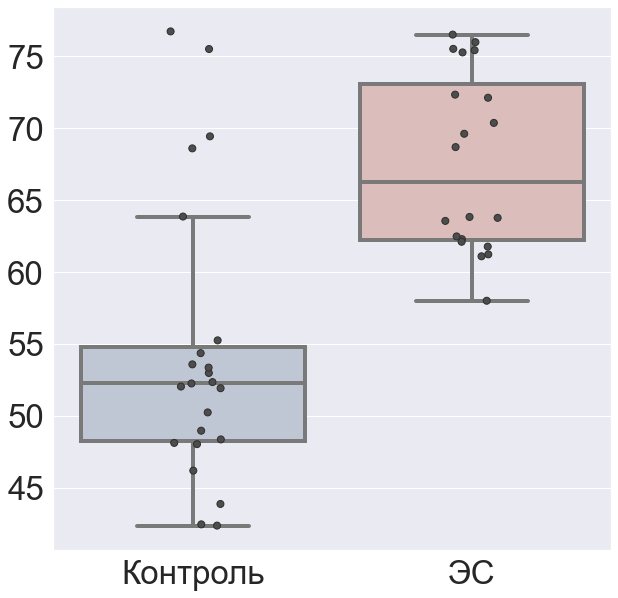

In [71]:
def boxplot_graph(data, dots): 
    plt.figure(figsize=(10,10)) # меняет размер графика
    sns.set_style("whitegrid")
    sns.set_theme(style="ticks")
    sns.set(font_scale=3)
    sns.boxplot(data = data, palette="vlag", fliersize = 0, linewidth = 4)
    if dots == True:
        sns.stripplot(data=data,
              size=7, color=".3", linewidth=1, jitter = True)

boxplot_graph(all_glt_num, dots = True)

Посчитаем медиану, 25 и 75 процентили

In [10]:
procentile_num_clusters = all_glt_num.quantile([0.25, 0.50 , 0.75])
print(procentile_num_clusters)

       Контроль         ЭС
0.25  48.234976  62.239983
0.50  52.248112  66.259594
0.75  54.802133  73.071731


Проверим отличается ли статистически достоверно количество кластеров после ЭС в сравнении с контролем, применив непараметрический критерий Манна-Уитни

In [68]:

stat_glt_num, p_glt_num = mannwhitneyu(all_glt_num.iloc[:, 0].dropna(), all_glt_num.iloc[:, 1].dropna())
print('Statistics=%.3f, p=%.5f' % (stat_glt_num, p_glt_num))

Statistics=68.000, p=0.00008


Шаг4. Рассчет параметров объема кластеров GLT-1
Рассчитаем медиану, процентили для объема кластеров GLT-1. 
Сначала загрузим в один столбец все имеющиеся значения объема кластеров для каждого животного c помощью функции one_col_stack, удалим null-значения из наших данных и рассчитаем медиану, процентили для объема кластеров GLT-1.

In [12]:
vol_glt_ctrl = pd.concat([N1_gs_glt_ctrl.iloc[:,::2],N2_gs_glt_ctrl.iloc[:,::2], N3_gs_glt_ctrl.iloc[:,::2], N4_gs_glt_ctrl.iloc[:,::2], N5_gs_glt_ctrl.iloc[:,::2]], axis=1, ignore_index=True)
vol_glt_SE = pd.concat([N1_gs_glt_SE.iloc[:,::2],N2_gs_glt_SE.iloc[:,::2], N3_gs_glt_SE.iloc[:,::2], N4_gs_glt_SE.iloc[:,::2], N5_gs_glt_SE.iloc[:,::2], N6_gs_glt_SE.iloc[:,::2]], axis=1, ignore_index=True)


In [74]:
vol_glt_ctrl = pd.concat([N1_gs_glt_ctrl.iloc[:,::2],N2_gs_glt_ctrl.iloc[:,::2], N3_gs_glt_ctrl.iloc[:,::2], N4_gs_glt_ctrl.iloc[:,::2], N5_gs_glt_ctrl.iloc[:,::2]], axis=1, ignore_index=True)
vol_glt_SE = pd.concat([N1_gs_glt_SE.iloc[:,::2],N2_gs_glt_SE.iloc[:,::2], N3_gs_glt_SE.iloc[:,::2], N4_gs_glt_SE.iloc[:,::2], N5_gs_glt_SE.iloc[:,::2], N6_gs_glt_SE.iloc[:,::2]], axis=1, ignore_index=True)


def one_col_stack (dataset):
    df = pd.DataFrame()
    for i in range(dataset.shape[1]):
        df = pd.concat([df, pd.Series(dataset.iloc[:,i].values)],axis=0)
    return(df)

vol_glt_ctrl= one_col_stack (vol_glt_ctrl)
vol_glt_SE = one_col_stack (vol_glt_SE)

vol_glt_ctrl.reset_index(inplace=True, drop=True)
vol_glt_SE.reset_index(inplace=True, drop=True)


all_vol_glt = pd.DataFrame()

all_vol_glt = vol_glt_ctrl.copy()
all_vol_glt = all_vol_glt.join(vol_glt_SE, how='outer',lsuffix = '_CTRL', rsuffix= '_SE')
all_vol_glt.rename(columns = {'0_CTRL' : 'Контроль', '0_SE' : 'ЭС'}, inplace = True)

all_vol_glt.loc[all_vol_glt['Контроль'].isnull()] = 0
all_vol_glt.loc[all_vol_glt['ЭС'].isnull()] = 0
all_vol_glt.sort_values(by=['Контроль', 'ЭС'], ascending=True, inplace=True)
all_vol_glt.drop(all_vol_glt[all_vol_glt['Контроль'] == 0].index, inplace=True)
all_vol_glt.drop(all_vol_glt[all_vol_glt['Контроль']> 1.7].index, inplace=True)#удалим выбросы
all_vol_glt.drop(all_vol_glt[all_vol_glt['ЭС']> 1.7].index, inplace=True)#удалим выбросы
all_vol_glt = all_vol_glt.reset_index(drop=True)


In [75]:
procentile_vol_clusters = all_vol_glt.quantile([0.25, 0.50 , 0.75])
print(procentile_vol_clusters)
stat_vol_glt, p_vol_glt = mannwhitneyu(all_vol_glt.iloc[:, 0], all_vol_glt.iloc[:, 1])
print()
print('Statistics=%.3f, p=%.3f' % (stat_vol_glt, p_vol_glt))

      Контроль     ЭС
0.25    0.2256  0.197
0.50    0.3795  0.339
0.75    0.5872  0.523

Statistics=1024818347.000, p=0.000


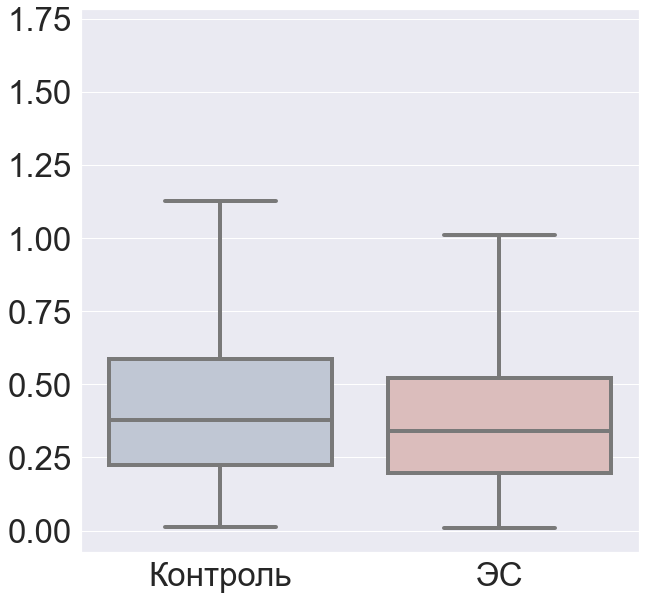

In [76]:
boxplot_graph(all_vol_glt , dots = False)

Посмотрим вероятность распределения

<AxesSubplot:ylabel='Probability'>

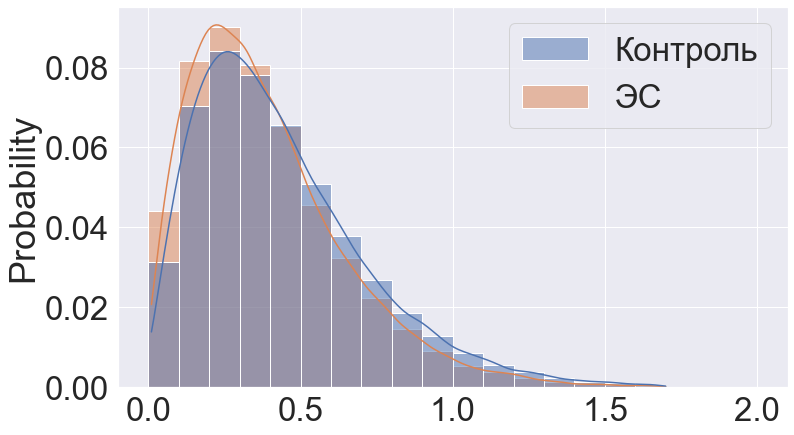

In [379]:
plt.figure(figsize=(12, 7)) # меняет размер графика
sns.set_style("whitegrid")
sns.set_theme(style="ticks")
sns.set(font_scale=3)
sns.histplot(all_vol_glt,stat='probability',binwidth= 0.1, kde = True, binrange= [0,2], linewidth = 1)

#N1_vf_ctrl  ['Контроль'] = N1_gs_glt_ctrl.sum().iloc[::2] # voluma fraction

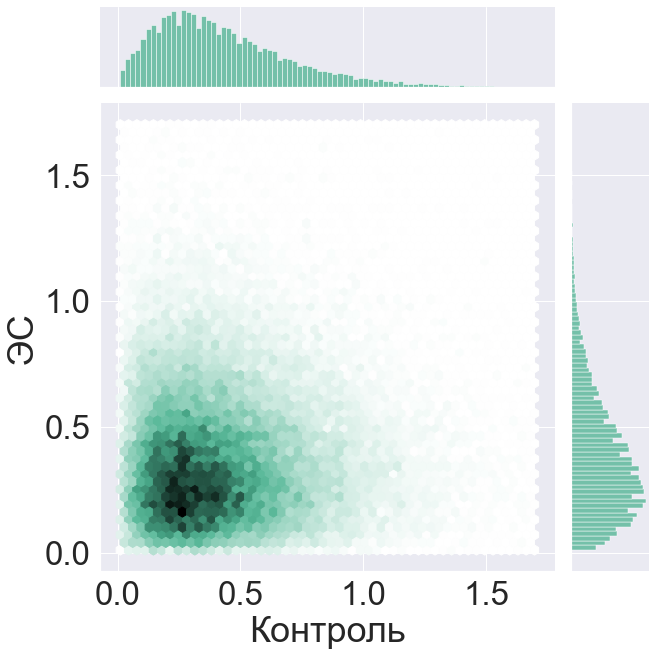

In [365]:
sns.jointplot(x = all_vol_glt['Контроль'], y = all_vol_glt['ЭС'], kind="hex", color="#4CB391", height = 10)

Теперь построим графики и рассчитаем необходимые параметры для GLT-1 volume fraction (vf)

In [57]:
N1_ctrl_vf_glt, N2_ctrl_vf_glt, N3_ctrl_vf_glt, N4_ctrl_vf_glt, N5_ctrl_vf_glt = pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

N1_gs_glt_ctrl.drop(N1_gs_glt_ctrl[N1_gs_glt_ctrl.iloc[:, 2]> 5000].index, inplace=True) #удалим выбросы

N1_ctrl_vf_glt ['Контроль'] = N1_gs_glt_ctrl.sum().iloc[::2]
N2_ctrl_vf_glt ['Контроль'] = N2_gs_glt_ctrl.sum().iloc[::2]
N3_ctrl_vf_glt ['Контроль'] = N3_gs_glt_ctrl.sum().iloc[::2]
N4_ctrl_vf_glt ['Контроль'] = N4_gs_glt_ctrl.sum().iloc[::2]
N5_ctrl_vf_glt ['Контроль'] = N5_gs_glt_ctrl.sum().iloc[::2]

N1_SE_vf_glt, N2_SE_vf_glt, N3_SE_vf_glt, N4_SE_vf_glt, N5_SE_vf_glt, N6_SE_vf_glt = pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()

N1_SE_vf_glt['ЭС'] = N1_gs_glt_SE.sum().iloc[::2]
N2_SE_vf_glt['ЭС'] = N2_gs_glt_SE.sum().iloc[::2]
N3_SE_vf_glt['ЭС'] = N3_gs_glt_SE.sum().iloc[::2]
N4_SE_vf_glt['ЭС'] = N4_gs_glt_SE.sum().iloc[::2]
N5_SE_vf_glt['ЭС'] = N5_gs_glt_SE.sum().iloc[::2]
N6_SE_vf_glt['ЭС'] = N6_gs_glt_SE.sum().iloc[::2]

vf_ctrl_glt_l = [N1_ctrl_vf_glt, N2_ctrl_vf_glt, N3_ctrl_vf_glt, N4_ctrl_vf_glt, N5_ctrl_vf_glt]
vf_SE_glt_l = [N1_SE_vf_glt, N2_SE_vf_glt, N3_SE_vf_glt, N4_SE_vf_glt, N5_SE_vf_glt, N6_SE_vf_glt]

all_vf_glt_ctrl = pd.concat(vf_ctrl_glt_l)
all_vf_glt_SE = pd.concat(vf_SE_glt_l)

In [58]:
all_glt_vf = pd.DataFrame()
all_glt_vf['Контроль'] = all_vf_glt_ctrl.iloc[:,0].values/df_tot_vol.iloc[:,0].values
all_glt_vf= all_glt_vf.join(pd.DataFrame(all_vf_glt_SE.iloc[:,0].values/df_tot_vol.iloc[:len(all_vf_glt_SE),1].values), how='outer')
all_glt_vf.rename(columns = {0 : 'ЭС'}, inplace = True)

Рассчитаем процентили и оценим отличаются ли статистически выборки

In [61]:
procentile_vf_glt = all_glt_vf.quantile([0.25, 0.50 , 0.75])
print(procentile_vf_glt)
stat_vf_glt, p_vf_glt = mannwhitneyu(all_glt_vf.iloc[:, 0], all_glt_vf.iloc[:, 1].dropna())
print()
print('Statistics=%.3f, p=%.3f' % (stat_vf_glt, p_vf_glt))

      Контроль        ЭС
0.25  0.178601  0.200951
0.50  0.197467  0.226530
0.75  0.204211  0.254161

Statistics=107.000, p=0.003


Построим графики для volume fraction

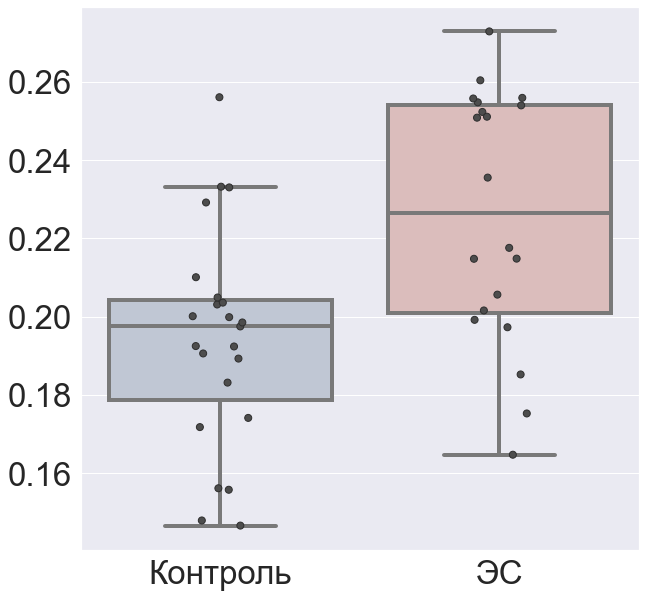

In [77]:
boxplot_graph(all_glt_vf , dots = True)

Построим графики и рассчитаем параметры surface-to-volume ratio (svr)

In [ ]:
N1_ctrl_svr_gtl, N2_ctrl_svr_gtl, N3_ctrl_svr_gtl, N4_ctrl_svr_gtl, N5_ctrl_svr_gtl = pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

N1_ctrl_svr_gtl = N1_gs_glt_ctrl.median().iloc[1::2]
N2_ctrl_svr_gtl = N2_gs_glt_ctrl.median().iloc[1::2]
N3_ctrl_svr_gtl = N3_gs_glt_ctrl.median().iloc[1::2]
N4_ctrl_svr_gtl = N4_gs_glt_ctrl.median().iloc[1::2]
N5_ctrl_svr_gtl = N5_gs_glt_ctrl.median().iloc[1::2]

N1_SE_svr_gtl, N2_SE_svr_gtl, N3_SE_svr_gtl, N4_SE_svr_gtl, N5_SE_svr_gtl, N6_SE_svr_gtl  = pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

N1_SE_svr_gtl = N1_gs_glt_SE.median().iloc[1::2]
N2_SE_svr_gtl = N2_gs_glt_SE.median().iloc[1::2]
N3_SE_svr_gtl = N3_gs_glt_SE.median().iloc[1::2]
N4_SE_svr_gtl = N4_gs_glt_SE.median().iloc[1::2]
N5_SE_svr_gtl = N5_gs_glt_SE.median().iloc[1::2]
N6_SE_svr_gtl = N6_gs_glt_SE.median().iloc[1::2]

svr_ctrl_gtl_l = [N1_ctrl_svr_gtl, N2_ctrl_svr_gtl, N3_ctrl_svr_gtl, N4_ctrl_svr_gtl, N5_ctrl_svr_gtl]
svr_SE_gtl_l = [N1_SE_svr_gtl, N2_SE_svr_gtl, N3_SE_svr_gtl, N4_SE_svr_gtl, N5_SE_svr_gtl, N6_SE_svr_gtl ]

all_svr_gtl_ctrl = pd.concat(svr_ctrl_gtl_l)
all_svr_gtl_SE = pd.concat(svr_SE_gtl_l)

all_svr_glt = pd.DataFrame()
all_svr_glt ['Контроль'] = (all_svr_gtl_ctrl.values/df_tot_vol.iloc[:,0].values)*100
all_svr_glt= all_svr_glt.join(pd.DataFrame((all_svr_gtl_SE.values/df_tot_vol.iloc[:len(all_svr_gtl_SE),1].values)*100), how='outer')
all_svr_glt.rename(columns = {0 : 'ЭС'}, inplace = True)


In [ ]:
procentile_svr_glt = all_svr_glt.quantile([0.25, 0.50 , 0.75])
print(procentile_svr_glt)
stat_svr_glt, p_svr_glt = mannwhitneyu(all_svr_glt.iloc[:, 0], all_svr_glt.iloc[:, 1].dropna())
print()
print('Statistics=%.3f, p=%.3f' % (stat_svr_glt, p_svr_glt))

      Контроль        ЭС
0.25  0.062461  0.063699
0.50  0.068943  0.076149
0.75  0.070917  0.079112

Statistics=110.000, p=0.004


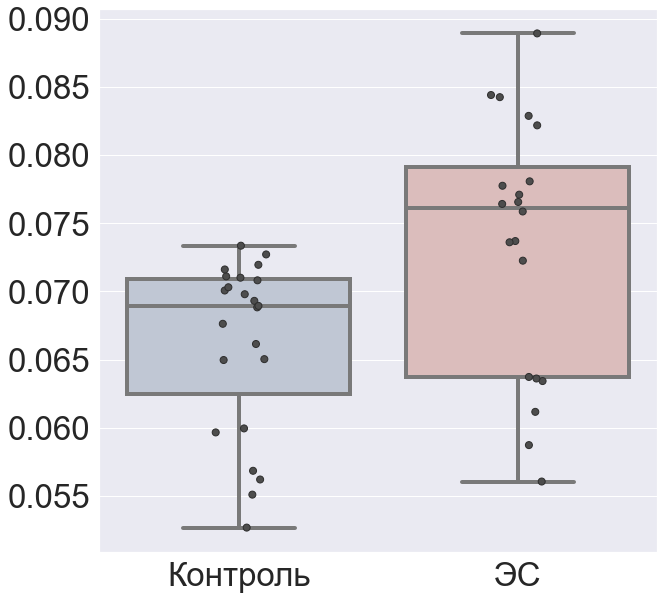

In [78]:
boxplot_graph(all_svr_glt, dots = True)